In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#주식종목과 기간
ticker='SBUX'
start_date='2022-01-01'
end_date='2022-12-31'

#주식 가격 데이터
data=yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,116.470001,117.800003,114.779999,116.680000,112.841209,5475700
2022-01-04,116.900002,117.050003,114.169998,114.239998,110.481468,8367600
2022-01-05,114.400002,114.959999,110.400002,110.440002,106.806496,8662300
2022-01-06,110.000000,111.879997,109.989998,111.139999,107.483467,6099900
2022-01-07,108.220001,109.709999,107.480003,107.570000,104.030922,11266400
...,...,...,...,...,...,...
2022-12-23,97.589996,98.300003,96.879997,98.269997,97.295570,3944500
2022-12-27,98.570000,99.459999,98.209999,99.199997,98.216347,4402500
2022-12-28,99.410004,99.910004,98.389999,98.599998,97.622299,3491500


In [ ]:
#이동 평균선 기간
short=50
long_window=200

data["ShortMA"]=data["Adj Close"].rolling(window=short, min_periods=1).mean()
data["LongMA"]=data["Adj Close"].rolling(window=long_window, min_periods=1).mean()



In [ ]:
#골든 크로스 시그널
data['Signal']=np.where(data["ShortMA"]>data["LongMA"],1,0)
data['Position']=data['Signal'].diff()

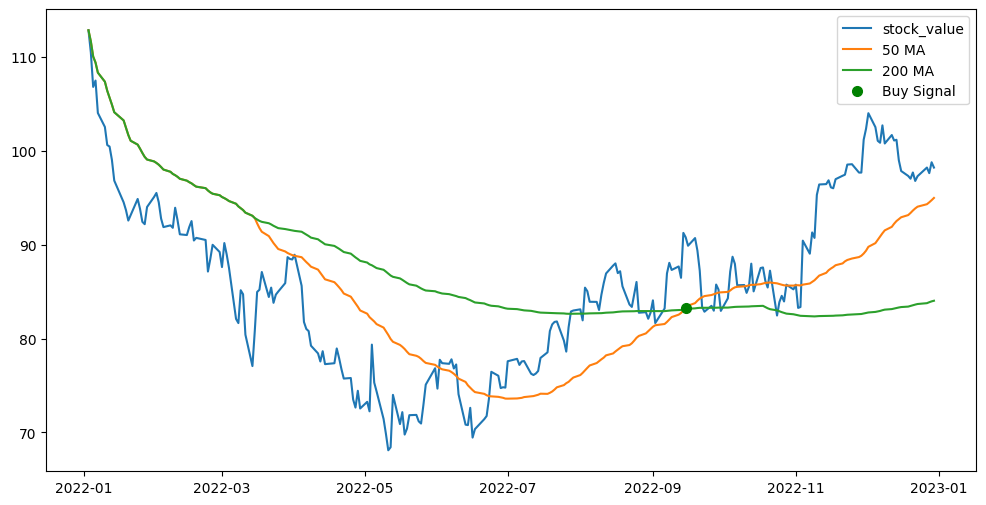

,Date
0,2022-09-15


In [ ]:
#시각화
fig, ax=plt.subplots(figsize=(12,6))

#이동평균선 그리기
ax.plot(data.index, data['Adj Close'],label='stock_value')
ax.plot(data.index, data['ShortMA'], label=f'{short} MA')
ax.plot(data.index, data['LongMA'], label=f'{long_window} MA')

#marker
ax.plot(data[data['Position']==1].index, data['ShortMA'][data['Position']==1],'o',markersize=7, color='g', label='Buy Signal')
ax.legend()

plt.show()

#매수일자 표시
dff=pd.DataFrame(data[data['Position']==1].index&data['ShortMA'][data['Position']==1].index)
dff